MSc Project

This aim of this project is to find insights into socio-demographic and economic factors that matter to life satisfaction, the main research question is, What matters most to peoples life satisfaction. The data used in this project is from the UK Data Archive and its a Annual Population Survey Three-Year Pooled Dataset, January 2021 - December 2023.

In [4]:
import pandas as pd

df = pd.read_csv(
    'aps_3yr_jan21dec23_eul_withoutsmoking.tab',
    delimiter='\t',
    low_memory=False,
    dtype={
        'CLAIMS14': 'Int64',  # nullable integer (handles -8 as NA)
        'CombinedAuthorities': 'string'
    },
    na_values=[-8]
)

# View the first few rows
df.head()

,AAGE,ACTHR,ACTHR2,ACTPOT,ACTUOT,ACTWKDY1,ACTWKDY2,ACTWKDY3,ACTWKDY4,ACTWKDY5,...,XDISDDA20,Y2JOB,YLESS20,YMORE,YPAYL20,YPAYM,YPTJOB,YSTART,YTETJB,YVARY99
0,13,-9.0,-9.0,-9.0,-9.0,2.0,3,-9,-9,-9,...,4,-9,-9.0,-9.0,-9.0,-9.0,4.0,-9.0,-9.0,-9.0
1,13,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9,-9,-9,...,4,-9,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
2,11,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9,-9,-9,...,1,-9,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3,12,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9,-9,-9,...,1,-9,-9.0,-9.0,-9.0,-9.0,-9.0,5.0,-9.0,-9.0
4,13,-9.0,-9.0,-9.0,-9.0,-9.0,-9,-9,-9,-9,...,4,-9,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341465 entries, 0 to 341464
Columns: 459 entries, AAGE to YVARY99
dtypes: Int64(1), float64(231), int64(212), object(14), string(1)
memory usage: 1.2+ GB


There are 341465 entries and 459 attributes.

In [7]:
# Count missing values in each column
missing_counts = df.isna().sum()

# Display missing values only for columns that have any
missing_counts[missing_counts > 0]

ACTWKDY1     552
ADDJOB        22
ANXIOUS     1082
APPR12         3
APPRCURR       4
            ... 
YPAYM          9
YPTJOB       253
YSTART         8
YTETJB         1
YVARY99       12
Length: 220, dtype: int64

First to start off the MSc project we need a measurement for the personal wellbeing level of UK citizens.

Pos.348(SATIS)-Overall, how satisfied are you with your life nowadays?

Pos.441(WORTH)-Overall, to what extent do you feel the things you do in your life are worthwhile?

Pos.122(HAPPY)-Overall, how happy did you feel yesterday?

Pos.15(ANXIOUS)-Overall, how anxious did you feel yesterday?

These 4 questions are about personal wellbeings and citizens are asked to respond on a scale of 0 to 10, making it easy for us to analyze. Estimates is then produced by taking the mean ratings of the 4 wellbeing questions. For life satisfaction, life worthwhile and happiness will be combined into one score and anxiety will be done seperatly because they dont mean the same for scores.

In [9]:
# Create Wellbeing column
df['Wellbeing'] = df[['SATIS', 'WORTH', 'HAPPY']].mean(axis=1, skipna=True)

# Check the result
df[['SATIS', 'WORTH', 'HAPPY', 'Wellbeing']].head()

,SATIS,WORTH,HAPPY,Wellbeing
0,8.0,8.0,7.0,7.666667
1,10.0,8.0,10.0,9.333333
2,10.0,9.0,10.0,9.666667
3,-9.0,-9.0,-9.0,-9.000000
4,8.0,5.0,8.0,7.000000


The following code creates labels for hresholds for life satisfaction, worthwhile, happiness and anxiety scores.

In [11]:
# Replace missing codes in Wellbeing column
df['Wellbeing'] = df['Wellbeing'].replace([-9, -8], pd.NA)

def classify_wellbeing(score):
    if pd.isna(score):
        return pd.NA
    elif score < 8:
        return 'Low'
    else:
        return 'High'

df['Wellbeing_category'] = df['Wellbeing'].apply(classify_wellbeing)


# Replace missing codes in ANXIOUS column
df['ANXIOUS'] = df['ANXIOUS'].replace([-9, -8], pd.NA)

def classify_anxiety(score):
    if pd.isna(score):
        return pd.NA
    elif score <= 1:
        return 'Very low'
    elif score <= 3:
        return 'Low'
    elif score <= 5:
        return 'Medium'
    else:
        return 'High'

df['Anxiety_category'] = df['ANXIOUS'].apply(classify_anxiety)

df[['Wellbeing', 'Wellbeing_category', 'ANXIOUS', 'Anxiety_category']].head()

,Wellbeing,Wellbeing_category,ANXIOUS,Anxiety_category
0,7.666667,Low,7.0,High
1,9.333333,High,0.0,Very low
2,9.666667,High,0.0,Very low
3,<NA>,<NA>,<NA>,<NA>
4,7.0,Low,1.0,Very low


In [12]:
df[['Wellbeing', 'Wellbeing_category', 'ANXIOUS', 'Anxiety_category']].isna().sum()

Wellbeing             169132
Wellbeing_category    169132
ANXIOUS               169369
Anxiety_category      169369
dtype: int64

Wellbeing and anxious is our 2 most important measurements, so if data are missing in both of these attributes predictions cannot be made, to prevent bias the entire row is dropped if both Wellbeing and ANXIOUS are missing.

In [14]:
cleaned = df[~(df['Wellbeing'].isna() & df['ANXIOUS'].isna())]

cleaned[['Wellbeing', 'ANXIOUS']].isna().sum()

Wellbeing     11
ANXIOUS      248
dtype: int64

In [15]:
category_order = {
    'Low': 0,
    'High': 1,
}
cleaned = cleaned.copy()
cleaned['Wellbeing_category_num'] = cleaned['Wellbeing_category'].map(category_order)

In this reasearch of wellbeing interviewees with age under 16 will be excluded since lots of the determinants are targetted to audiences over 16 and doesnt apply on non adults.

In [17]:
# Remove rows where AAGE indicates "Under 16"
cleaned = cleaned[cleaned['AAGE'] != 1.0]
print(cleaned['AAGE'].value_counts().sort_index())

AAGE
2       293
3       525
4      2909
5      6573
6      9586
7     10685
8     11510
9     11813
10    14584
11    17031
12    18517
13    68318
Name: count, dtype: int64


In [18]:
import numpy as np

# Define mapping
aage_to_avg = {
    2.0: 17,  # 16-17
    3.0: 19,  # 18-19
    4.0: 22,    # 20-24
    5.0: 27,    # 25-29
    6.0: 32,    # 30-34
    7.0: 37,    # 35-39
    8.0: 42,    # 40-44
    9.0: 47,    # 45-49
    10.0: 52,   # 50-54
    11.0: 57,   # 55-59
    12.0: 62,   # 60-64
    13.0: 82    # 65-99
}

# Apply mapping 
cleaned['AGE'] = cleaned['AAGE'].map(aage_to_avg)

# Map GOR9d to numeric codes
region_map = {
    'E12000001': 1,  # North East
    'E12000002': 2,  # North West
    'E12000003': 3,  # Yorkshire and The Humber
    'E12000004': 4,  # East Midlands
    'E12000005': 5,  # West Midlands
    'E12000006': 6,  # East of England
    'E12000007': 7,  # London
    'E12000008': 8,  # South East
    'E12000009': 9,  # South West
    'L99999999': 10, # Channel Islands (pseudo)
    'M99999999': 11, # Isle of Man (pseudo)
    'N99999999': 12, # Northern Ireland
    'S99999999': 13, # Scotland (pseudo)
    'W99999999': 14  # Wales (pseudo)
}

# Apply the mapping to create a new column
cleaned['GOR9d_num'] = cleaned['GOR9d'].map(region_map)

# Step 1: Define HEALPB2001 to HEALPB2010
health_cols = [f'HEALPB20{str(i).zfill(2)}' for i in range(1, 11)]

# Step 2: Ensure correct dtype and replace -8 with NaN (keep -9)
cleaned[health_cols] = cleaned[health_cols].astype('Int64').replace(-8, np.nan)

# Step 3: Define mapping of health code to descriptive name
health_labels = {
    1: "ArmsOrHands",
    2: "LegsOrFeet",
    3: "BackOrNeck",
    4: "SeeingDifficulty",
    5: "HearingDifficulty",
    6: "SpeechImpediment",
    7: "Disfigurements",
    8: "BreathingProblems",
    9: "HeartOrCirculation",
    10: "DigestiveOrgans",
    11: "Diabetes",
    12: "MentalAnxiety",
    13: "Epilepsy",
    14: "LearningDifficulties",
    15: "MentalIllness",
    16: "ProgressiveIllness",
    17: "OtherProblems",
    18: "Autism"
}

# Step 4: Efficient one-pass creation of HEALTH_* columns
for code, label in health_labels.items():
    col_name = f'HEALTH_{label}'

    if col_name not in cleaned.columns:
        # Use vectorized comparison and any across the row
        cleaned[col_name] = (cleaned[health_cols] == code).any(axis=1).astype(int)

print("Optimized HEALTH columns created.")

Optimized HEALTH columns created.


In [19]:
cleaned.to_csv("cleaned.csv", index=False)

In [20]:
import pandas as pd
cleaned = pd.read_csv("cleaned.csv",low_memory=False)

## **Data exploration**


In [22]:
# Dictionary
feature_labels = {
    # SEX
    'SEX_1': 'Male',
    'SEX_2': 'Female',

    # ETHUKEUL (Ethnicity)
    'ETHUKEUL_1.0': 'White',
    'ETHUKEUL_2.0': 'Mixed/Multiple ethnic groups',
    'ETHUKEUL_3.0': 'Indian',
    'ETHUKEUL_4.0': 'Pakistani',
    'ETHUKEUL_5.0': 'Bangladeshi',
    'ETHUKEUL_6.0': 'Chinese',
    'ETHUKEUL_7.0': 'Any other Asian background',
    'ETHUKEUL_8.0': 'Black/African/Caribbean/Black British',
    'ETHUKEUL_9.0': 'Other ethnic group',

    # MARDY6 (Marital status)
    'MARDY6_1': 'Married/Cohabiting/Civil Partner',
    'MARDY6_2': 'Non-married',

    # ILODEFR (Economic activity)
    'ILODEFR_1': 'In employment',
    'ILODEFR_2': 'ILO unemployed',
    'ILODEFR_3': 'Inactive',

    # TEN1 (Accommodation details)
    'TEN1_1.0': 'Owned outright',
    'TEN1_2.0': 'Being bought with mortgage or loan',
    'TEN1_3.0': 'Part rent, part mortgage',
    'TEN1_4.0': 'Rented',
    'TEN1_5.0': 'Rent free or squatted',
    'TEN1_6.0': 'Squatting',

    # XDISDDA20 (Unadjusted DDA disabled)
    'XDISDDA20_-9': 'Does not apply',
    'XDISDDA20_1': 'Current disability only',
    'XDISDDA20_2': 'Current and past disabled',
    'XDISDDA20_3': 'Past disability only',
    'XDISDDA20_4': 'Not DDA disabled',

    # LEVQUL22 (RQF Level of highest qualification)
    'LEVQUL22_-9': 'Does not apply',
    'LEVQUL22_1': 'RQF Level 8 (Doctorate)',
    'LEVQUL22_2': 'RQF Level 7 (Master’s)',
    'LEVQUL22_3': 'RQF Level 6 (Bachelor’s)',
    'LEVQUL22_4': 'RQF Level 5 (HND/Foundation Degree)',
    'LEVQUL22_5': 'RQF Level 4 (CertHE)',
    'LEVQUL22_6': 'RQF Level 3 (A-Levels)',
    'LEVQUL22_7': 'RQF Level 2 (GCSE A*-C)',
    'LEVQUL22_8': 'RQF Level 1 (GCSE D-G)',
    'LEVQUL22_9': 'RQF Entry Level',
    'LEVQUL22_10': 'Other Qualifications',
    'LEVQUL22_11': 'No Qualifications',
    'LEVQUL22_12': 'Don’t Know (Qualification)',

    # INDE07M (Industry sector in main job)
    'INDE07M_-9.0': 'Does not apply',
    'INDE07M_1.0': 'Agriculture, forestry and fishing',
    'INDE07M_2.0': 'Energy and water',
    'INDE07M_3.0': 'Manufacturing',
    'INDE07M_4.0': 'Construction',
    'INDE07M_5.0': 'Distribution, hotels and restaurants',
    'INDE07M_6.0': 'Transport and communication',
    'INDE07M_7.0': 'Banking and finance',
    'INDE07M_8.0': 'Public admin, education and health',
    'INDE07M_9.0': 'Other services',

    # RELIG11 (Religion)
    'RELIG11_1.0': 'No Religion',
    'RELIG11_2.0': 'Christian',
    'RELIG11_3.0': 'Buddhist',
    'RELIG11_4.0': 'Hindu',
    'RELIG11_5.0': 'Jewish',
    'RELIG11_6.0': 'Muslim',
    'RELIG11_7.0': 'Sikh',
    'RELIG11_8.0': 'Other Religion',

    # GOR9d (Region)
    'GOR9d_num_1': 'North East',
    'GOR9d_num_2': 'North West',
    'GOR9d_num_3': 'Yorkshire and The Humber',
    'GOR9d_num_4': 'East Midlands',
    'GOR9d_num_5': 'West Midlands',
    'GOR9d_num_6': 'East of England',
    'GOR9d_num_7': 'London',
    'GOR9d_num_8': 'South East',
    'GOR9d_num_9': 'South West',
    'GOR9d_num_10': '(pseudo) Channel Islands',
    'GOR9d_num_11': '(pseudo) Isle of Man',
    'GOR9d_num_12': 'Northern Ireland',
    'GOR9d_num_13': '(pseudo) Scotland',
    'GOR9d_num_14': '(pseudo) Wales',

    # HEALTH binary indicators
    'HEALTH_Diabetes': 'Diabetes',
    'HEALTH_MentalAnxiety': 'Mental Anxiety',
    'HEALTH_ArmsOrHands': 'Arms/Hands Disability',
    'HEALTH_LegsOrFeet': 'Legs/Feet Disability',
    'HEALTH_BackOrNeck': 'Back/Neck Disability',
    'HEALTH_MentalIllness': 'Mentai Illness',
    'HEALTH_Autism': 'Autism',
    'HEALTH_ProgressiveIllness': 'ProgressiveIllness',
    'HEALTH_HeartOrCirculation': 'HeartOrCirculation',
    'NATIDB11': 'British Identity',
}

In [23]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE

# --- Feature Groups ---
columns = {
    'AGE': 'AGE',
    'SEX': 'SEX',
    'ETHNICITY': 'ETHUKEUL',
    'MIGRATION': 'NATIDB11',
    'REL_STATUS': 'MARDY6',
    'ECON_ACTIVITY': 'ILODEFR',
    'TENURE': 'TEN1',
    'DISABILITY': 'XDISDDA20',
    'QUALIFICATION': 'LEVQUL22',
    'Job_Sector': 'INDE07M',
    'RELIGION': 'RELIG11',
    'REGION': 'GOR9d_num',
    'DIABETES': 'HEALTH_Diabetes',
    'MentalAnxiety': 'HEALTH_MentalAnxiety',
    'ArmsDisability': 'HEALTH_ArmsOrHands',
    'LegsDisability': 'HEALTH_LegsOrFeet',
    'BackDisability': 'HEALTH_BackOrNeck',
    'MentalIllness': 'HEALTH_MentalIllness',
    'Autism': 'HEALTH_Autism',
    'ProgressiveIllness': 'HEALTH_ProgressiveIllness',
    'HeartOrCirculation': 'HEALTH_HeartOrCirculation'
}

nominal_cols = [
    'LEVQUL22', 'ILODEFR', 'MARDY6', 'SEX',
    'ETHUKEUL', 'TEN1', 'XDISDDA20', 'INDE07M', 'RELIG11', 'GOR9d_num'
]

binary_cols = [
    'NATIDB11', 'HEALTH_Diabetes', 'HEALTH_MentalAnxiety',
    'HEALTH_ArmsOrHands', 'HEALTH_LegsOrFeet', 
    'HEALTH_BackOrNeck','HEALTH_MentalIllness', 'HEALTH_Autism',
    'HEALTH_ProgressiveIllness', 'HEALTH_HeartOrCirculation'
]

continuous_cols = ['AGE']

print("Imports and column groups loaded.")

Imports and column groups loaded.


In [24]:
# --- Step 1: Clean and prepare base dataframe ---
relevant_cols = list(columns.values()) + ['Wellbeing_category_num']
model_df = cleaned[relevant_cols].copy().dropna()

X = model_df[list(columns.values())].copy()
y = model_df['Wellbeing_category_num'].copy()

X[binary_cols] = X[binary_cols].astype(int)
X[nominal_cols] = X[nominal_cols].astype('category')
X[continuous_cols] = X[continuous_cols].apply(pd.to_numeric, errors='coerce')

# --- Step 2: One-hot encode nominal columns ---
X_nominal = pd.get_dummies(X[nominal_cols], drop_first=False)
X_final = pd.concat([X[continuous_cols], X[binary_cols], X_nominal], axis=1)

# --- Step 3: Split into train/val/test ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X_final, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Data prepared and split.")
print(f"Train:       {X_train.shape}")
print(f"Validation:  {X_val.shape}")
print(f"Test:        {X_test.shape}")

Data prepared and split.
Train:       (113869, 78)
Validation:  (24401, 78)
Test:        (24401, 78)


In [25]:
# --- Step 1: Scale continuous features ---
scaler = StandardScaler()
X_train_scaled_cont = scaler.fit_transform(X_train[continuous_cols])
X_val_scaled_cont = scaler.transform(X_val[continuous_cols])
X_test_scaled_cont = scaler.transform(X_test[continuous_cols])

# --- Step 2: Combine final feature sets ---
X_train_scaled = np.hstack([
    X_train_scaled_cont,
    X_train[binary_cols].values,
    X_train[X_nominal.columns].values
])
X_val_scaled = np.hstack([
    X_val_scaled_cont,
    X_val[binary_cols].values,
    X_val[X_nominal.columns].values
])
X_test_scaled = np.hstack([
    X_test_scaled_cont,
    X_test[binary_cols].values,
    X_test[X_nominal.columns].values
])

# --- Step 3: Apply SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# --- Step 4: Output shape summary ---
print(f"One-Hot Encoded Train:       {X_train_scaled.shape}")
print(f"One-Hot Encoded Validation:  {X_val_scaled.shape}")
print(f"One-Hot Encoded Test:        {X_test_scaled.shape}")
print(f"One-Hot Encoded Train (SMOTE): {X_train_resampled.shape}")

One-Hot Encoded Train:       (113869, 78)
One-Hot Encoded Validation:  (24401, 78)
One-Hot Encoded Test:        (24401, 78)
One-Hot Encoded Train (SMOTE): (115758, 78)


Train shape (original): (113869, 21)
Validation:             (24401, 21)
Test:                   (24401, 21)
Train shape (SMOTE):    (115758, 21)

Wellbeing_category_num distribution in y_train (BEFORE SMOTE):
Wellbeing_category_num
0.0    55990
1.0    57879
Name: count, dtype: int64

Wellbeing_category_num distribution in y_train (AFTER SMOTE):
Wellbeing_category_num
0.0    57879
1.0    57879
Name: count, dtype: int64


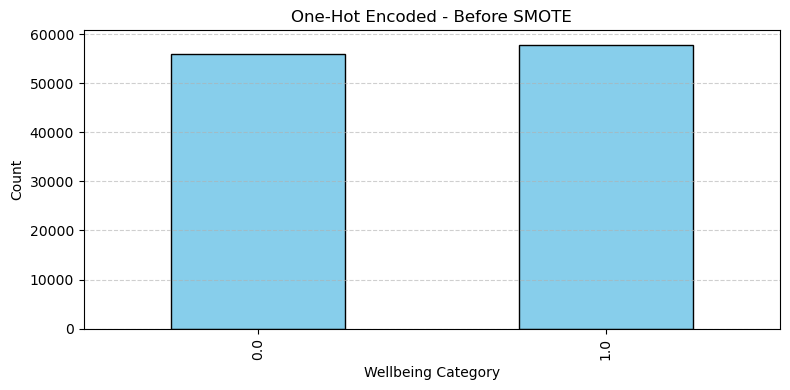

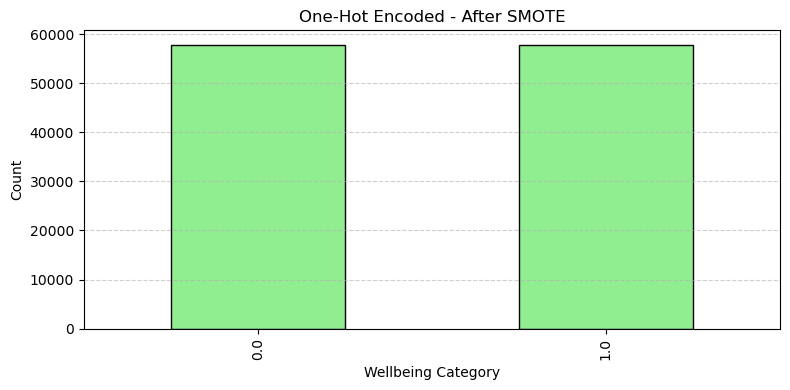

In [26]:
# --- Step 1: Copy and label-encode nominal columns ---
X_label = X.copy()
ordinal_encoder = OrdinalEncoder()
X_label[nominal_cols] = ordinal_encoder.fit_transform(X_label[nominal_cols])

# --- Step 2: Reuse train/val/test indices ---
X_train_idx = X_train.index
X_val_idx = X_val.index
X_test_idx = X_test.index

# --- Step 3: Scale continuous for label-encoded version ---
scaler_label = StandardScaler()
X_train_label_scaled_cont = scaler_label.fit_transform(X_label.loc[X_train_idx, continuous_cols])
X_val_label_scaled_cont = scaler_label.transform(X_label.loc[X_val_idx, continuous_cols])
X_test_label_scaled_cont = scaler_label.transform(X_label.loc[X_test_idx, continuous_cols])

# --- Step 4: Combine label-encoded features ---
X_train_label_final = np.hstack([
    X_train_label_scaled_cont,
    X_label.loc[X_train_idx, binary_cols].values,
    X_label.loc[X_train_idx, nominal_cols].values
])
X_val_label_final = np.hstack([
    X_val_label_scaled_cont,
    X_label.loc[X_val_idx, binary_cols].values,
    X_label.loc[X_val_idx, nominal_cols].values
])
X_test_label_final = np.hstack([
    X_test_label_scaled_cont,
    X_label.loc[X_test_idx, binary_cols].values,
    X_label.loc[X_test_idx, nominal_cols].values
])

# --- Step 5: Apply SMOTE to label-encoded set ---
smote_label = SMOTE(random_state=42)
X_train_label_resampled, y_train_label_resampled = smote_label.fit_resample(X_train_label_final, y_train)

# --- Step 6: Output shape summary ---
print(f"Train shape (original): {X_train_label_final.shape}")
print(f"Validation:             {X_val_label_final.shape}")
print(f"Test:                   {X_test_label_final.shape}")
print(f"Train shape (SMOTE):    {X_train_label_resampled.shape}")

# --- Step 7: Output distribution before & after SMOTE ---
print("\nWellbeing_category_num distribution in y_train (BEFORE SMOTE):")
print(y_train.value_counts(dropna=False).sort_index())

print("\nWellbeing_category_num distribution in y_train (AFTER SMOTE):")
print(pd.Series(y_train_resampled).value_counts().sort_index())

# --- Step 8: Visualize ---
plt.figure(figsize=(8, 4))
y_train.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("One-Hot Encoded - Before SMOTE")
plt.xlabel("Wellbeing Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
pd.Series(y_train_resampled).value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("One-Hot Encoded - After SMOTE")
plt.xlabel("Wellbeing Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

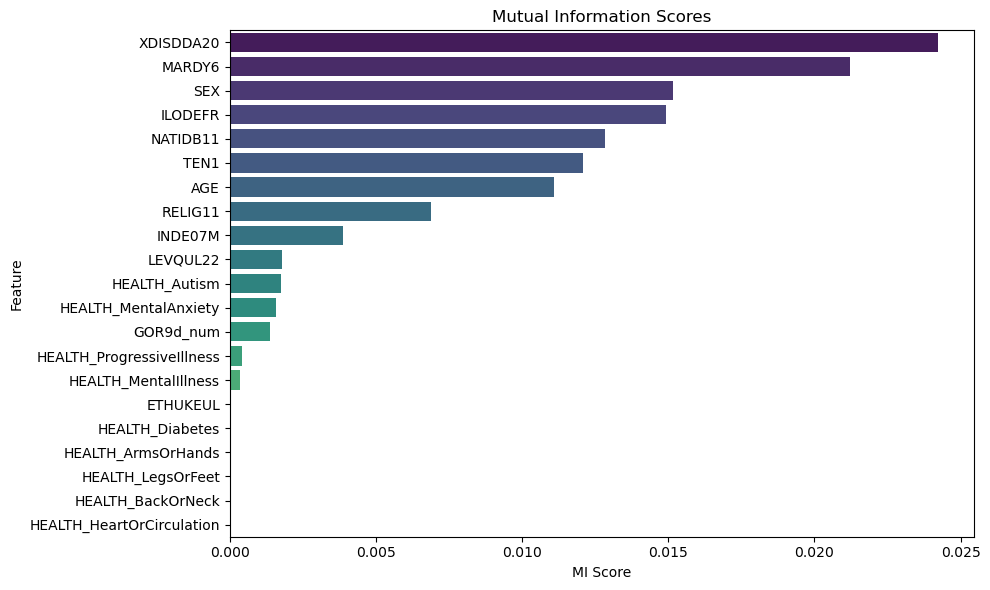

In [27]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
# --- Mutual Information Feature Importance ---
mi_scores = mutual_info_classif(X_label, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=mi_df,
    x='MI Score',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **Model building**


Model: Random Forest
Train Accuracy: 0.8427
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84     57879
         1.0       0.82      0.89      0.85     57879

    accuracy                           0.84    115758
   macro avg       0.85      0.84      0.84    115758
weighted avg       0.85      0.84      0.84    115758



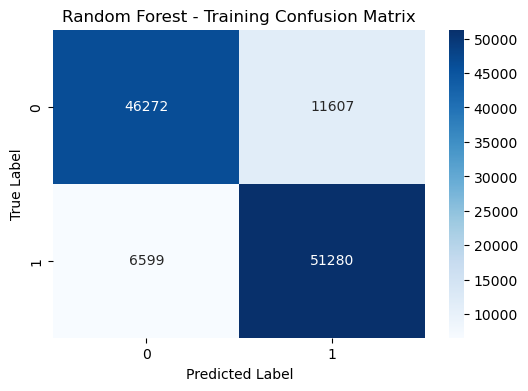

Test Accuracy: 0.5711
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.54      0.55     11998
         1.0       0.57      0.60      0.59     12403

    accuracy                           0.57     24401
   macro avg       0.57      0.57      0.57     24401
weighted avg       0.57      0.57      0.57     24401



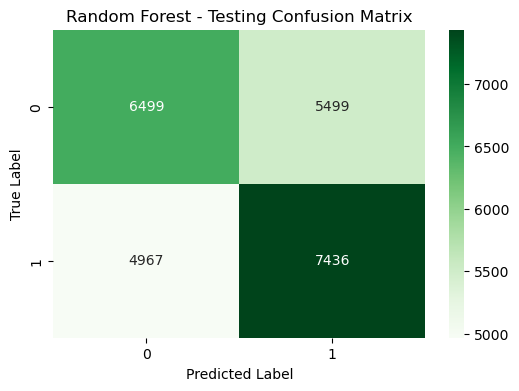


Model: XGBoost
Train Accuracy: 0.6345
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.57      0.61     57879
         1.0       0.62      0.70      0.66     57879

    accuracy                           0.63    115758
   macro avg       0.64      0.63      0.63    115758
weighted avg       0.64      0.63      0.63    115758



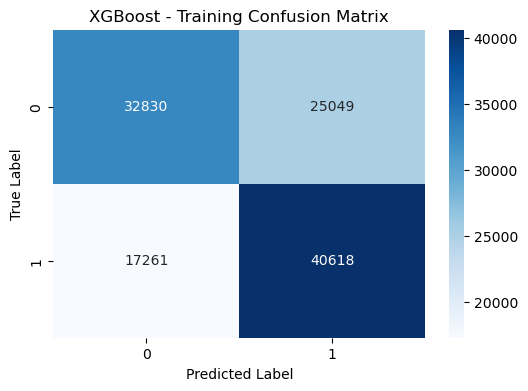

Test Accuracy: 0.6017
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.53      0.57     11998
         1.0       0.60      0.67      0.63     12403

    accuracy                           0.60     24401
   macro avg       0.60      0.60      0.60     24401
weighted avg       0.60      0.60      0.60     24401



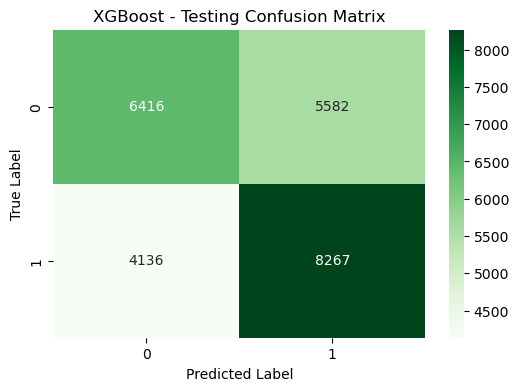


Model: LightGBM
[LightGBM] [Info] Number of positive: 57879, number of negative: 57879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 115758, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Train Accuracy: 0.6221
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59     57879
         1.0       0.61      0.69      0.65     57879

    accuracy                           0.62    115758
   macro avg       0.62      0.62      0.62    115758
weighted avg       0.62      0.62      0.62    115758



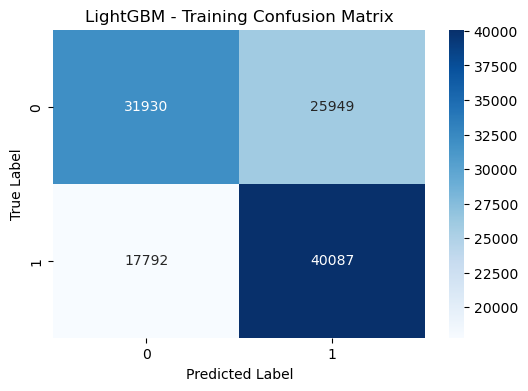

Test Accuracy: 0.6040
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.53      0.57     11998
         1.0       0.60      0.68      0.63     12403

    accuracy                           0.60     24401
   macro avg       0.61      0.60      0.60     24401
weighted avg       0.61      0.60      0.60     24401



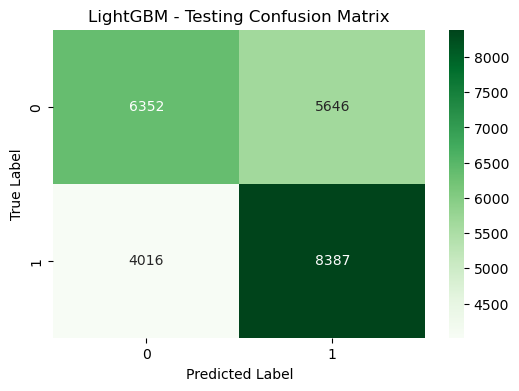

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- Initialize models ---
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)

models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm
}

# --- Train, predict, and evaluate ---
for name, model in models.items():
    print(f"\nModel: {name}")
    
    # Train
    model.fit(X_train_label_resampled, y_train_label_resampled)

    # Predict on training set
    y_pred_train = model.predict(X_train_label_resampled)
    acc_train = accuracy_score(y_train_label_resampled, y_pred_train)
    print(f"Train Accuracy: {acc_train:.4f}")
    print("Training Classification Report:")
    print(classification_report(y_train_label_resampled, y_pred_train))
    
    cm_train = confusion_matrix(y_train_label_resampled, y_pred_train)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Training Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Predict on test set
    y_pred_test = model.predict(X_test_label_final)
    acc_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {acc_test:.4f}")
    print("Testing Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
    plt.title(f"{name} - Testing Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<Figure size 640x480 with 0 Axes>

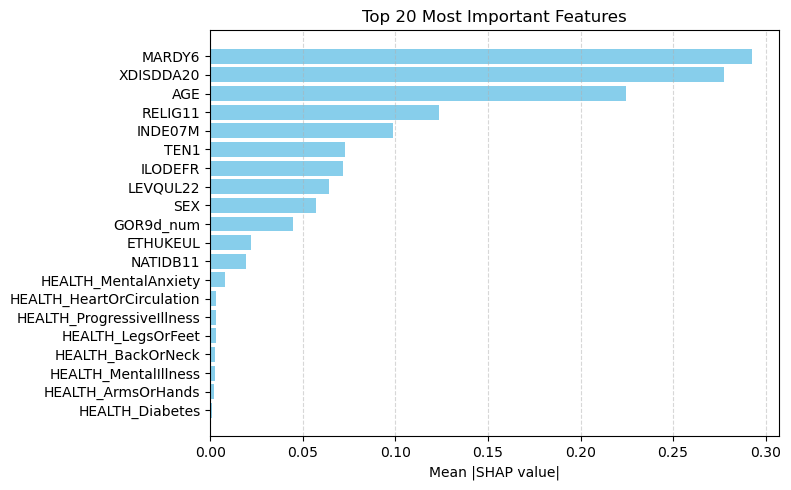

In [65]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Refit your XGBoost model on the label-encoded, resampled data
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_label_resampled, y_train_label_resampled)

# Step 2: Use TreeExplainer on trained XGBoost model
explainer = shap.TreeExplainer(xgb)

# Step 3: Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_label_final)

# Step 4: Optional - Provide feature names (if you want meaningful plots)
# Reconstruct full feature name list
feature_names = list(continuous_cols) + list(binary_cols) + list(nominal_cols)

# Step 5: Plot SHAP summary
plt.figure()
# Compute mean absolute SHAP values
shap_vals = np.abs(shap_values).mean(axis=0)
top_indices = np.argsort(shap_vals)[::-1][:20]  # Top 20 features

# Plot manually
plt.figure(figsize=(8, 5))
plt.barh(np.array(feature_names)[top_indices][::-1], shap_vals[top_indices][::-1], color='skyblue')
plt.xlabel("Mean |SHAP value|")
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()



Model: Logistic Regression
Training Performance:
              precision    recall  f1-score   support

         0.0       0.61      0.56      0.59     57879
         1.0       0.60      0.65      0.62     57879

    accuracy                           0.60    115758
   macro avg       0.61      0.60      0.60    115758
weighted avg       0.61      0.60      0.60    115758



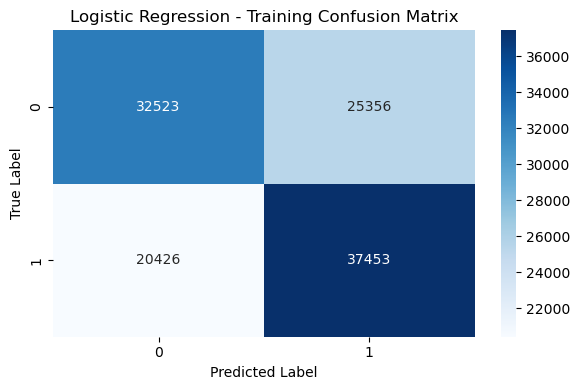

Testing Performance:
              precision    recall  f1-score   support

         0.0       0.60      0.56      0.58     11998
         1.0       0.60      0.64      0.62     12403

    accuracy                           0.60     24401
   macro avg       0.60      0.60      0.60     24401
weighted avg       0.60      0.60      0.60     24401



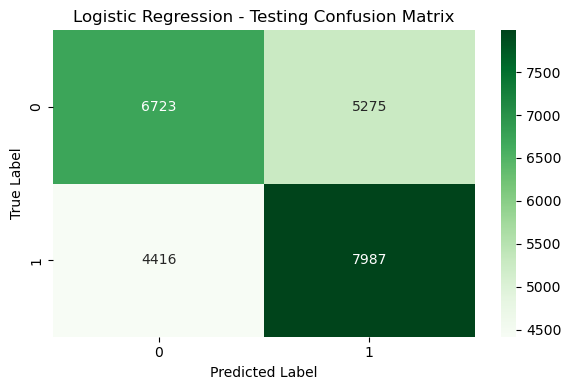


Model: K-Nearest Neighbors
Training Performance:
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68     57879
         1.0       0.68      0.69      0.69     57879

    accuracy                           0.68    115758
   macro avg       0.68      0.68      0.68    115758
weighted avg       0.68      0.68      0.68    115758



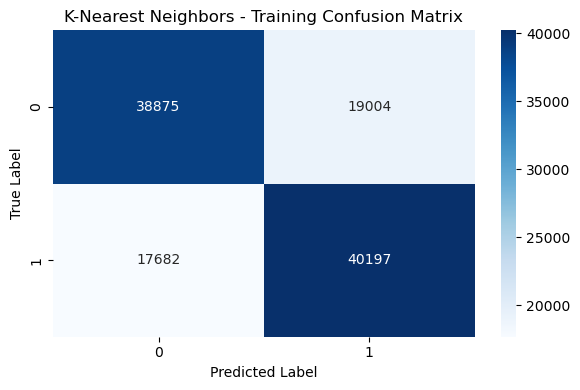

Testing Performance:
              precision    recall  f1-score   support

         0.0       0.55      0.55      0.55     11998
         1.0       0.56      0.57      0.57     12403

    accuracy                           0.56     24401
   macro avg       0.56      0.56      0.56     24401
weighted avg       0.56      0.56      0.56     24401



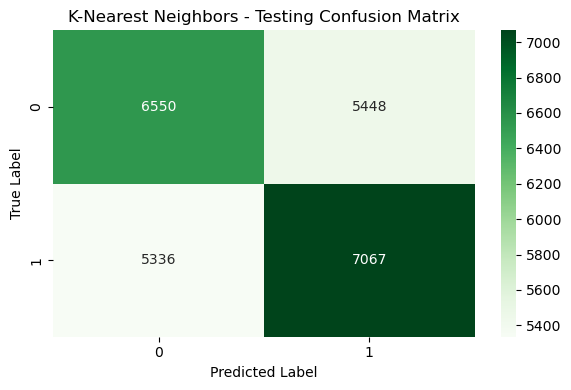


Model: Neural Network (MLP)
Training Performance:
              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65     57879
         1.0       0.65      0.72      0.69     57879

    accuracy                           0.67    115758
   macro avg       0.67      0.67      0.67    115758
weighted avg       0.67      0.67      0.67    115758



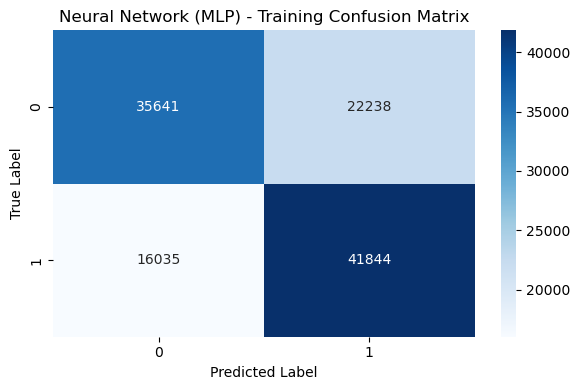

Testing Performance:
              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54     11998
         1.0       0.57      0.63      0.60     12403

    accuracy                           0.57     24401
   macro avg       0.57      0.57      0.57     24401
weighted avg       0.57      0.57      0.57     24401



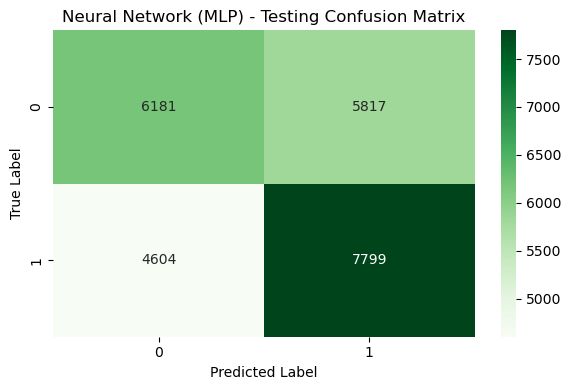

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# List of models to test
models_onehot = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

for name, model in models_onehot.items():
    print(f"\nModel: {name}")
    
    # Train
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on training set
    y_pred_train = model.predict(X_train_resampled)
    print("Training Performance:")
    print(classification_report(y_train_resampled, y_pred_train))

    # Confusion matrix for training set
    cm_train = confusion_matrix(y_train_resampled, y_pred_train)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Training Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Predict on test set
    y_pred_test = model.predict(X_test_scaled)
    print("Testing Performance:")
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix for test set
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
    plt.title(f"{name} - Testing Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()